# **Linear Regression Model**

## **Load the Dataset**

In [92]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ML Projects/Clean_Dataset.csv')
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


## **Data Preprocessing**

In [80]:
df.shape

(300153, 12)

In [81]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [83]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [84]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [85]:
df.nunique()

Unnamed: 0          300153
airline                  6
flight                1561
source_city              6
departure_time           6
stops                    3
arrival_time             6
destination_city         6
class                    2
duration               476
days_left               49
price                12157
dtype: int64

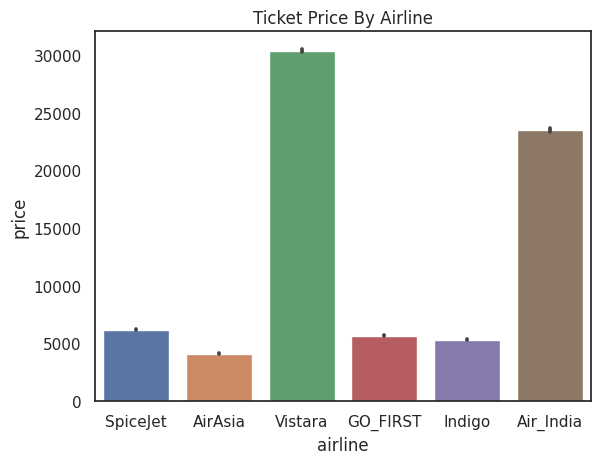

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=df["airline"] , y=df["price"])
plt.title("Ticket Price By Airline")
plt.show()

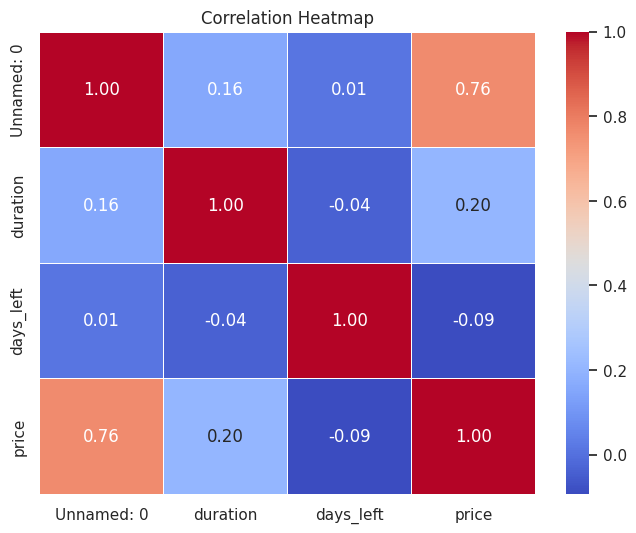

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "white")
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only = True) , annot=True , cmap='coolwarm' , fmt='.2f' , linewidth=0.5)
plt.title('Correlation Heatmap')
plt.show()

### **Encoding Categorical Features**
**Converting the Categorical Columns (features with dtypes=object) into numerical features (dtypes = int64)**

In [89]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['class'] = label_encoder.fit_transform(df['class'])

df['destination_city'] = label_encoder.fit_transform(df['destination_city'])

df['arrival_time'] = label_encoder.fit_transform(df['arrival_time'])

df['stops'] = label_encoder.fit_transform(df['stops'])

df['departure_time'] = label_encoder.fit_transform(df['departure_time'])

df['source_city'] = label_encoder.fit_transform(df['source_city'])

df['flight'] = label_encoder.fit_transform(df['flight'])

df['airline'] = label_encoder.fit_transform(df['airline'])


### **Data Scaling**

In [90]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df = standard_scaler.fit_transform(df)
df

array([[-1.73204504,  0.48827006,  0.74916287, ..., -1.39753079,
        -1.84387477, -0.65806849],
       [-1.7320335 ,  0.48827006,  0.69994728, ..., -1.3752838 ,
        -1.84387477, -0.65806849],
       [-1.73202195, -1.69363332,  0.29216101, ..., -1.39753079,
        -1.84387477, -0.65793631],
       ...,
       [ 1.73202195,  1.0337459 ,  0.93196361, ...,  0.22371837,
         1.69569214,  2.56454459],
       [ 1.7320335 ,  1.0337459 ,  0.92493281, ..., -0.30881888,
         1.69569214,  2.67407096],
       [ 1.73204504,  1.0337459 ,  0.91087121, ..., -0.29769538,
         1.69569214,  2.67407096]])

### **Separation of X (features) and Y (Target)**

In [93]:
y = df["price"]
x = df.drop(columns=["price"])

In [94]:
y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64

In [95]:
x

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1
...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49


### **Data Spliting into Training and Test sets**

In [96]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2, random_state=100)

In [97]:
x_train.shape


(240122, 11)

In [98]:
x_test.shape

(60031, 11)

In [99]:
y_train.shape

(240122,)

In [100]:
y_test.shape

(60031,)

### **Encoding Categorical Features**


In [101]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

x_train['class'] = label_encoder.fit_transform(x_train['class'])
x_test['class'] = label_encoder.transform(x_test['class'])

x_train['destination_city'] = label_encoder.fit_transform(x_train['destination_city'])
x_test['destination_city'] = label_encoder.transform(x_test['destination_city'])

x_train['arrival_time'] = label_encoder.fit_transform(x_train['arrival_time'])
x_test['arrival_time'] = label_encoder.transform(x_test['arrival_time'])

x_train['stops'] = label_encoder.fit_transform(x_train['stops'])
x_test['stops'] = label_encoder.transform(x_test['stops'])

x_train['departure_time'] = label_encoder.fit_transform(x_train['departure_time'])
x_test['departure_time'] = label_encoder.transform(x_test['departure_time'])

x_train['source_city'] = label_encoder.fit_transform(x_train['source_city'])
x_test['source_city'] = label_encoder.transform(x_test['source_city'])

x_train['flight'] = label_encoder.fit_transform(x_train['flight'])
x_test['flight'] = label_encoder.fit_transform(x_test['flight'])

x_train['airline'] = label_encoder.fit_transform(x_train['airline'])
x_test['airline'] = label_encoder.transform(x_test['airline'])


## **Model Phase**

### **Building the model**

In [103]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

### **Training the model**

In [104]:
lr.fit(x_train , y_train)

LinearRegression()

### **Apply the model to make predictions**

In [105]:
y_lr_test_pred = lr.predict(x_test)

## **Evaluating the model**

In [137]:
from sklearn.metrics import mean_squared_error, r2_score

lr_test_mse = mean_squared_error(y_test , y_lr_test_pred)
lr_test_r2 = r2_score(y_test , y_lr_test_pred)

lr_results = pd.DataFrame(['Linear Regression', lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ["Method","Test MSE", "Test R2"]
lr_results

,Method,Test MSE,Test R2
0,Linear Regression,49171067.385183,0.904829


# **RandomForest**

In [107]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=100)

In [108]:
rf.fit(x_train , y_train)

RandomForestRegressor(random_state=100)

In [109]:
y_rf_test_pred = rf.predict(x_test)

In [110]:
from sklearn.metrics import mean_squared_error, r2_score

rf_test_mse = mean_squared_error(y_test , y_rf_test_pred)
rf_test_r2 = r2_score(y_test , y_rf_test_pred)

In [111]:
rf_results = pd.DataFrame(['Random Forest', rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ["Method","Test MSE", "Test R2"]
rf_results

,Method,Test MSE,Test R2
0,Random Forest,50426665.470066,0.902399


In [135]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

In [114]:
dt.fit(x_train , y_train)

DecisionTreeRegressor()

In [115]:
y_dt_test_pred = dt.predict(x_test)

In [116]:
from sklearn.metrics import mean_squared_error, r2_score

dt_test_mse = mean_squared_error(y_test , y_dt_test_pred)
dt_test_r2 = r2_score(y_test , y_dt_test_pred)

In [117]:
dt_results = pd.DataFrame(['Decision Tree', dt_test_mse, dt_test_r2]).transpose()
dt_results.columns = ["Method" , "Test MSE", "Test R2"]
dt_results

,Method,Test MSE,Test R2
0,Decision Tree,72082945.487132,0.860484


# **Model Comparison**

In [118]:
df_models = pd.concat([lr_results, rf_results , dt_results], axis=0)
df_models

,Method,Test MSE,Test R2
0,Linear Regression,49171067.385183,0.904829
0,Random Forest,50426665.470066,0.902399
0,Decision Tree,72082945.487132,0.860484


In [119]:
df_models.reset_index(drop=True)

,Method,Test MSE,Test R2
0,Linear Regression,49171067.385183,0.904829
1,Random Forest,50426665.470066,0.902399
2,Decision Tree,72082945.487132,0.860484


# **Conclusion**
We can see that:

**Linear Regression Model** has the highest prediction accuracy with 90.48%

**Random Forest Model** is also great at prediciting the price of flight ticket with 90.23% accuracy.

**Decision Tree Model** is still efficient but has a preicidiction accuracy of 85% that is still less accurate than "Linear regression" and "Random Forest" Models